Ideas for how to implement simple two-layer climate model with interactive components
========

Useful info:
* https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html
* (possibly) https://stackoverflow.com/questions/31911884/interactive-plots-placement-in-ipython-notebook-widget

TODO: 
* Display forcing as well.
* Fit model against obs using minimization.
* Get updated AR6 forcing data.
* Get SSP scenario data for future.
* Simple instructions on how to get working.
* Why is uncertainty lacking one year (runs 1850-2015).
* Rationalize all input data CSV files.
* RMSE vs obs. (Values seem different to Excel)

DONE: 
* **Check/compare model output with Excel.** Was using lambda=0.08 instead of 0.8.
* **Get obs data as CSV and compare against obs.** Done, plus uncertainty.
* **Check it works using AppsAnywhere on windows.** Works for me with no extra setup.
* **Dropdown for SSP scenario.** UI element there but doesn't work yet.
* **Better control layout - nice to get some sort of grid.** Layout good enough for time being.
* **Buttons to turn e.g. all anthro on/off, reset vars to defaults.** Done. Was a bit tricky getting it all working together.


Updates:
* 29/7/22: Initial playing. Import forcing data (exported from Excel as CSV). Implement simple model which is a copy of the Excel CLIMATE MODEL tab. Get interactive controls working with checkboxes and sliders.
* 29/7/22: Try on AppsAnywhere. Fix problem with lambda value. Get obs data.
* 29/7/22: Nicer layout of controls.
* 4/8/22: Fix buttons to e.g. set all anthro forcings on/off. Split into model/UI. Make mode usable on its own.

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import climate_model
import importlib
importlib.reload(climate_model)
model = climate_model.ClimateModel()
ui = climate_model.ClimateModelUI(model)
ui.display()

Output()

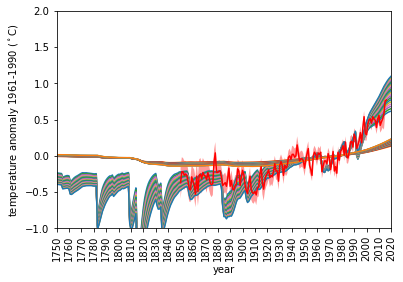

In [73]:
fig, ax = plt.subplots()
for lam in np.linspace(0.4, 1, 21):
    model.run_model(lam=lam)
    model.plot(ax=ax)
model.base_plot(ax=ax, future_scenario=None)


In [36]:
model.forcings

,YEAR,CO2,Other well mixed GHGs,Trop. O3,Strat. O3,Direct Sulphate Aerosol,Aerosol-Cloud Interactions,Biomass Burning Aerosol,Black & Organic Carbon Aerosol,Solar,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,SCALING,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1750,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1751,-0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1752,-0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,-0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1753,-0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,-0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2096,1.92,1.03,0.38,-0.03,-0.36,-0.44,0.05,0.16,0.08,...,6.28,1.87,0.44,0.0,-0.09,-0.30,0.01,0.07,-0.03,0.0
348,2097,1.92,1.03,0.38,-0.03,-0.36,-0.44,0.05,0.16,0.08,...,6.33,1.87,0.44,0.0,-0.09,-0.30,0.01,0.07,0.02,0.0
349,2098,1.92,1.03,0.38,-0.03,-0.36,-0.44,0.05,0.16,0.08,...,6.38,1.88,0.44,0.0,-0.09,-0.30,0.01,0.07,0.09,0.0
350,2099,1.92,1.03,0.38,-0.03,-0.36,-0.44,0.05,0.16,0.08,...,6.44,1.89,0.44,0.0,-0.09,-0.30,0.01,0.07,0.13,0.0
